In [18]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [19]:
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)

In [93]:
import numpy as np
import matplotlib.pyplot as pl
from scipy import interpolate
import h5py
import qnm
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
import pandas as pd
from numpy import vectorize
from scipy.interpolate import interp2d
from scipy.optimize import minimize
from scipy.optimize import least_squares
import seaborn as sns
pl.rc('figure', figsize=(6.1, 4.5))
pl.rcParams.update({'text.usetex': False,
                     'font.family': 'serif',
                     'font.serif': ['Georgia'],
                     'mathtext.fontset': 'cm',
                     'lines.linewidth': 2.5,
                     'font.size': 14,
                     'xtick.labelsize': 'medium',
                     'ytick.labelsize': 'medium',
                     'xtick.direction': 'in',
                     'ytick.direction': 'in',
                     'axes.labelsize': 'large',
                     'axes.titlesize': 'large',
                     å'axes.grid': False,
                     'grid.alpha': 0.73,
                     'lines.markersize': 12,
                     'legend.borderpad': 0.2,
                     'legend.fancybox': True,
                     'legend.fontsize': 12,
                     'legend.framealpha': 0.7,
                     'legend.handletextpad': 0.5,
                     'legend.labelspacing': 0.2,
                     'legend.loc': 'best',
                     'savefig.dpi': 80,
                     'pdf.compression': 9})

In [252]:
name='overtone_'
name=''
t_init='6.0'

In [253]:
finalfinal=np.loadtxt('rest_finer/'+name+'t_'+t_init)

In [254]:
np.sum(np.exp(finalfinal))

7.112529609289326e-63

In [255]:
chispace=np.arange(0.0,0.95,0.005)
massspace=np.arange(34,100,0.1)

In [256]:
X, Y = np.meshgrid(massspace,chispace)

In [257]:
if name=='overtone_':
    mass_old_sampling=np.loadtxt('../mcmc/longer/all/mass'+t_init)
    spin_old_sampling=np.loadtxt('../mcmc/longer/all/spin'+t_init)
elif name=='':
    mass_old_sampling=np.loadtxt('../mcmc/longer/all_1/mass'+t_init)
    spin_old_sampling=np.loadtxt('../mcmc/longer/all_1/spin'+t_init)

In [258]:
# pl.rc('figure', figsize=(7.5, 5.5))
# fig, ax = pl.subplots()
# contours=ax.contourf(X, Y, finalfinal,20, cmap='Spectral', origin='lower',alpha=1,linestyles='--')
# # ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
# ax.xaxis.set_major_locator(MultipleLocator(10))
# ax.yaxis.set_major_locator(MultipleLocator(0.1))
# # ax.scatter(mass_old_sampling,spin_old_sampling,s=1,c='r')
# ax.scatter(x=68.5,y=0.69,s=105,marker='+',c='w',linewidths=4,label='IMR')
# ax.set_xlim(min(massspace),max(massspace))
# ax.set_ylim(min(chispace),max(chispace))
# cbar=fig.colorbar(contours,orientation="vertical", pad=0.05,format='%3.2f')

# sns.kdeplot(x=mass_old_sampling,y=spin_old_sampling,levels=[0.1],color='ivory',linestyles='--')

# cbar.set_label(r'$\log_{10}$ likelihood',fontsize=15)
# cbar.set_ticks(np.linspace(np.min(finalfinal),np.max(finalfinal),5))
# pl.xlabel(r'$M_f/M_\odot$',fontsize=13)
# pl.ylabel(r'$\chi_f$',fontsize=13)
# pl.grid(alpha=0.4)

# # contoursnew=ax.contour(contours,levels=[-151.],linewidths=2,linestyles='--',colors='pink')

# # counterlabel=ax.clabel(contoursnew,contoursnew.levels
# #                        , inline=True, fontsize=10,fmt='%3.0f'
# #                        ,rightside_up=False,use_clabeltext=True,colors='pink')


# # for l in counterlabel:
# #     l.set_rotation(0)

# # ax.set_title(r'$\mathcal{F}_{220}$')
# if name=='overtone_':
#     ax.set_title(r'$\mathcal{F}_{221}\mathcal{F}_{220}$')
# elif name=='':
#     ax.set_title(r'$\mathcal{F}_{220}$')
# # pl.savefig('vary_filter/'+name+'t'+t_init+'.pdf')

In [259]:
finalfinalnorm=finalfinal.flatten()-np.max(finalfinal.flatten())
mass_max=np.sum((X.flatten())*np.exp(finalfinalnorm)/np.sum(np.exp(finalfinalnorm)))
spin_max=np.sum((Y.flatten())*np.exp(finalfinalnorm)/np.sum(np.exp(finalfinalnorm)))

In [260]:
epsilong=np.sqrt(((mass_max-68.5)/68.5)**2+(spin_max-0.69)**2)
epsilong

0.14963895259524787

In [261]:
0.84e-3/(68.5*2950./2/299792458)

2.492398017765681

In [262]:
2.3*(68.5*2950./2/299792458)

0.0007751570921774155

In [263]:
proj_spin=np.sum(np.exp(finalfinal),axis=1)
proj_mass=np.sum(np.exp(finalfinal),axis=0)

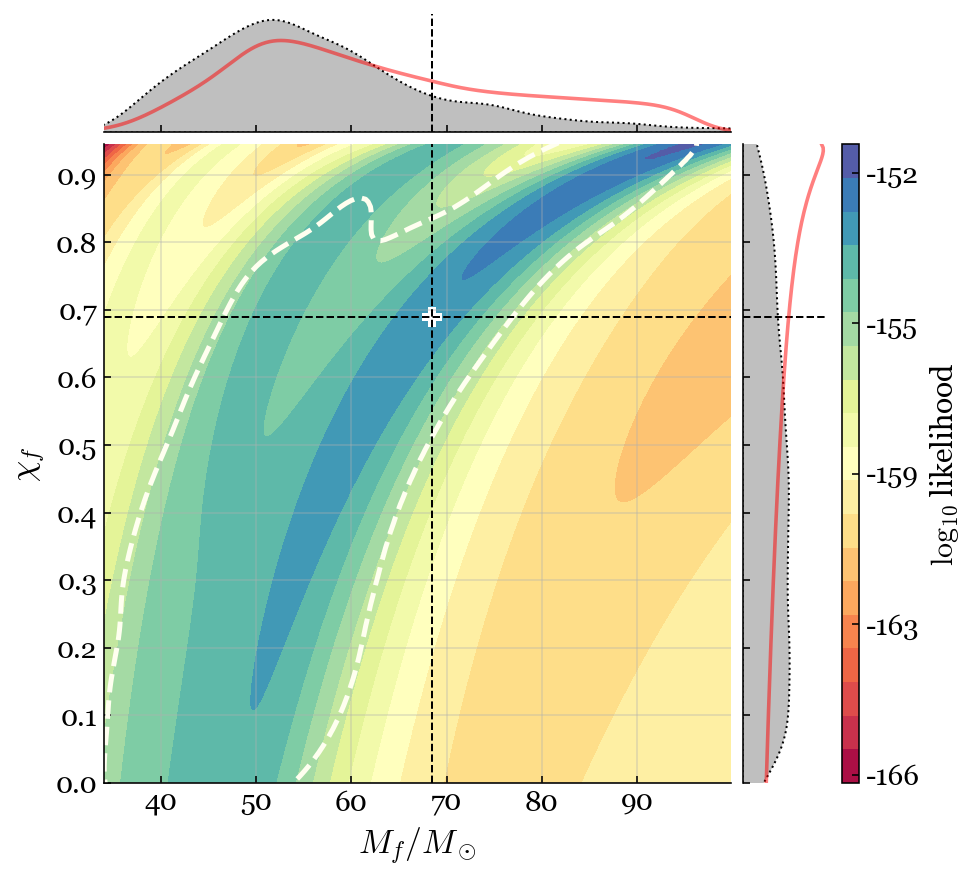

In [264]:
g = sns.JointGrid(ratio=5,space=0.1)
df = pd.DataFrame({
    r'$M_f / M_\odot$': mass_old_sampling,
    r'$\chi_f$':spin_old_sampling
})

sns.kdeplot(data=df, x = r'$M_f / M_\odot$', y = r'$\chi_f$', levels=[0.1],alpha=1, ax=g.ax_joint,color='ivory',linestyles='--')
contours=g.ax_joint.contourf(X, Y, finalfinal,20, cmap='Spectral', origin='lower',alpha=1,linestyles='--')
# ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
g.ax_joint.xaxis.set_major_locator(MultipleLocator(10))
g.ax_joint.yaxis.set_major_locator(MultipleLocator(0.1))
# ax.scatter(mass_old_sampling,spin_old_sampling,s=1,c='r')
g.ax_joint.scatter(x=68.5,y=0.69,s=105,marker='+',c='w',linewidths=4,label='IMR')
g.ax_joint.set_xlim(min(massspace),max(massspace))
g.ax_joint.set_ylim(min(chispace),max(chispace))
g.ax_joint.axvline(68.5,ls='--',lw=1,c='k')
g.ax_joint.axhline(0.69,ls='--',lw=1,c='k')
divider = make_axes_locatable(g.ax_marg_y)
cax = divider.append_axes('right', size='20%', pad=0.1)
# cax = divider.new_vertical(size="5%", pad=0.7, pack_start=True)
# g.fig.add_axes(cax)
cbar=g.fig.colorbar(contours,cax=cax,orientation="vertical",format='%3.0f',ax=g.ax_marg_y)

cbar.set_label(r'$\log_{10}$ likelihood',fontsize=15)
cbar.set_ticks(np.linspace(np.min(finalfinal),np.max(finalfinal),5))
# pl.xlabel(r'$M_f/M_\odot$',fontsize=13)
# pl.ylabel(r'$\chi_f$',fontsize=13)
g.ax_joint.grid(alpha=0.4)

sns.kdeplot(df[r'$M_f / M_\odot$'], ax=g.ax_marg_x, color = 'k',linestyle=':',fill=True)
g.ax_marg_x.axvline(68.5,ls='--',lw=1,c='k')
g.ax_marg_x.plot(massspace,proj_mass/np.sum(proj_mass)/(massspace[1]-massspace[0]),label='new',color='r',lw=1.8,alpha=0.5)

sns.kdeplot(y=df[r'$\chi_f$'], ax=g.ax_marg_y, color = 'k',linestyle=':',fill=True)
g.ax_marg_y.axhline(0.69,ls='--',lw=1,c='k')
g.ax_marg_y.plot(proj_spin/np.sum(proj_spin)/(chispace[1]-chispace[0]),chispace,label='new',color='r',lw=1.8,alpha=0.5)
# contoursnew=ax.contour(contours,levels=[-151.],linewidths=2,linestyles='--',colors='pink')

# counterlabel=ax.clabel(contoursnew,contoursnew.levels
#                        , inline=True, fontsize=10,fmt='%3.0f'
#                        ,rightside_up=False,use_clabeltext=True,colors='pink')


# for l in counterlabel:
#     l.set_rotation(0)

# ax.set_title(r'$\mathcal{F}_{220}$')
pl.savefig('vary_filter/'+name+'t'+t_init+'.pdf',bbox_inches='tight')
